In [115]:
# import packages
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
import pandas as pd

In [116]:
import pandas as pd 
import numpy as np
import openai
import os
import langchain
import faiss # defunct needs to be removed
from langchain.vectorstores import FAISS # defunct needs to be removed
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
import pickle
from langchain.chat_models import ChatOpenAI
#from langchain.chains import VectorDBQAWithSourcesChain
from langchain.chains import RetrievalQAWithSourcesChain
from langchain import OpenAI
from langchain.vectorstores import Chroma
import time

import matplotlib

import dotenv
from dotenv import load_dotenv
load_dotenv()
# load the .env file
dotenv.load_dotenv()
# add the api key to the environment
openai.api_key = os.environ["OPENAI_API_KEY"]


In [3]:
#import data 
complete_emebed_party = pd.read_csv('../processed_data/complete_emebed_party.csv')

In [10]:
complete_emebed_party.columns

Index(['schoolname', 'mission_statement', 'mission_statement_shorten',
       'ada_embedding', 'countydescription', 'political_afil',
       'extract_name_clean_list', 'principal/directoremail', 'website',
       'board_of_directors_link', 'link_domain_match', 'director_first_last',
       'cleaner_names', 'zipcode', 'political_affilation', 'postal_code',
       'latitude', 'longitude', 'count_dem', 'count_rep', 'count_una',
       'district_count_dem', 'district_count_rep', 'district_count_una',
       'charter_majority_party', 'district_majority_party'],
      dtype='object')

In [104]:
complete_emebed_party.head()

,schoolname,mission_statement,mission_statement_shorten,ada_embedding,countydescription,political_afil,extract_name_clean_list,principal/directoremail,website,board_of_directors_link,...,longitude,count_dem,count_rep,count_una,district_count_dem,district_count_rep,district_count_una,charter_majority_party,district_majority_party,Cluster
0,North Carolina Cyber Academy,The mission of the school is to ensure that ea...,NaN,"[-0.022048141807317734, 0.012611066922545433, ...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",mhill@myncca.com,myncca.com,https://www.myncca.com/our-school-board,...,-78.9178,5,2,0,6,0,1,Democrat,Democrat,1
1,NC Virtual Academy,The vision of the school is to be a rich schoo...,The mission statement of the school for studen...,"[0.0047307563945651054, 0.0009017903357744217,...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",kgomersall@ncvacademy.org,ncvacademy.org,https://ncva.k12.com/about-our-school/board-of...,...,-78.9178,2,2,2,6,0,1,Tie,Democrat,1
2,Maureen Joy Charter School,The vision/mission of the school for students ...,The mission statement of the school for studen...,"[-0.006839691661298275, 0.003196117701008916, ...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",Dcannon@joycharter.org,joycharter.org,https://www.joycharter.org/board,...,-78.8439,6,1,2,6,0,1,Democrat,Democrat,1
3,Durham Charter School,The vision of Durham Charter School is to prep...,The mission statement of Durham Charter School...,"[0.007524167187511921, 0.00907169096171856, -0...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",aquigley@durhamcharter.org,durhamcharter.org,https://www.durhamcharter.org/board-of-directors/,...,-78.8966,2,4,4,6,0,1,Republican,Democrat,0
4,Community School of Digital & Visual Art,The mission of the school is to build students...,The mission statement of the school for studen...,"[-0.001325286808423698, 0.011081067845225334, ...",Durham,"['DEM', 'UNA', 'DEM', 'DEM', 'DEM', 'DEM', 'DEM']","['Bettina Umstead', ' Emily Chavez', ' Natalie...",OAdeniyi@communitydva.org,communitydva.org,https://www.communitydva.org/,...,-78.9478,5,0,1,6,0,1,Democrat,Democrat,1


In [12]:
# Create a t-SNE model and transform the data
#complete_emebed_party['ada_embedding'] = complete_emebed_party['ada_embedding'].apply(eval)
embeddings = np.stack(complete_emebed_party['ada_embedding'].values)  # convert embeddings to numpy array
school_names = complete_emebed_party['schoolname'].values
charter_pol_affiliation = complete_emebed_party['charter_majority_party'].values  # replace with actual column name
district_pol_affiliation = complete_emebed_party['district_majority_party'].values  # replace with actual column name
country_description = complete_emebed_party['countydescription'].values

# Apply t-SNE to the embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Convert the 2D embeddings to a DataFrame
df_2d = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
df_2d['schoolname'] = school_names
df_2d['charter_political_affiliation'] = charter_pol_affiliation
df_2d['district_political_affiliation'] = district_pol_affiliation
df_2d['countydescription'] = country_description

#define color scheme 
color_discrete_map = {'Democrat':'blue', 'Republican':'red', 'Tie': 'green'}

In [23]:
fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with Charter Political Affiliation', color='charter_political_affiliation', color_discrete_map=color_discrete_map,hover_data=['schoolname', 'district_political_affiliation', 'countydescription'])
fig.show()

In [22]:
fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with District Political Affiliation', color='district_political_affiliation',color_discrete_map=color_discrete_map, hover_data=['schoolname', 'charter_political_affiliation', 'countydescription'])
fig.show()

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans

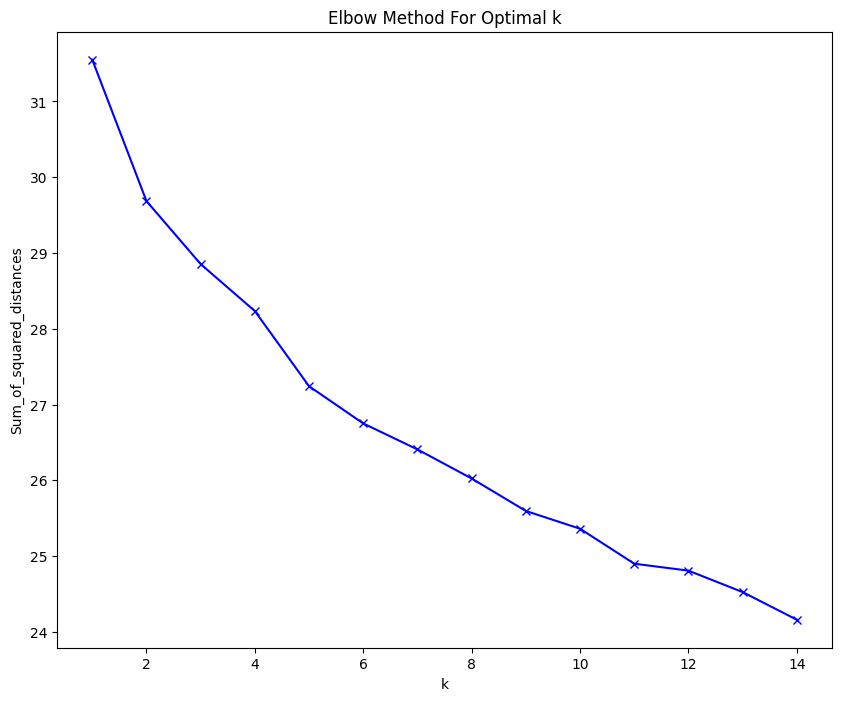

In [44]:
## elbow test the damn thing

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

matrix = np.vstack(complete_emebed_party.ada_embedding.values)

sse = [] # sum of squared distances
K = range(1, 15) # test up to 15 clusters, adjust as necessary

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(matrix)
    sse.append(kmeans.inertia_)

# plot
plt.figure(figsize=(10,8))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show() # holy shit there is no elbow

In [52]:
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(complete_emebed_party.ada_embedding.values)
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
complete_emebed_party['Cluster'] = kmeans.labels_

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\chris\AppData\Local\Temp\ipykernel_18936\2850246872.py:12: RuntimeWarning:

Mean of empty slice.

c:\Users\chris\.conda\envs\charter\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in divide

C:\Users\chris\AppData\Local\Temp\ipykernel_18936\2850246872.py:13: RuntimeWarning:

Mean of empty slice.



Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

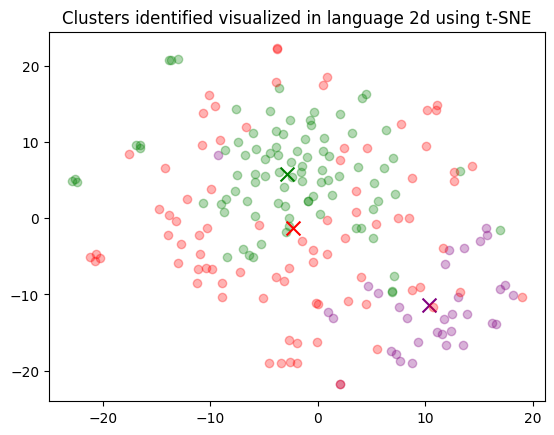

In [74]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate='auto')
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[complete_emebed_party.Cluster == category]
    ys = np.array(y)[complete_emebed_party.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [103]:
import plotly.express as px

# Assuming you've performed TSNE and have your DataFrame ready
df_vis = pd.DataFrame({
    'x': x,
    'y': y,
    'Cluster': complete_emebed_party.Cluster,
    'SchoolName': complete_emebed_party.schoolname,
    'DistrictPoliticalAffiliation': complete_emebed_party.district_majority_party,
    'CharterPoliticalAffiliation':complete_emebed_party.charter_majority_party  # Replace with your actual column
})

fig = px.scatter(df_vis, x='x', y='y', color='Cluster', hover_data=['SchoolName', 'DistrictPoliticalAffiliation','CharterPoliticalAffiliation'])

fig.show()

In [69]:
# First, count the occurrences of each political affiliation within each cluster
df_count = complete_emebed_party.groupby(['Cluster', 'district_majority_party']).size().reset_index(name='Counts')

# Then, create a bar chart
fig = px.bar(df_count, x='Cluster', y='Counts', color='district_majority_party', barmode='group', 
             labels={'Counts':'Number of Schools', 'Cluster':'Cluster ID'})

fig.show()

In [57]:
# First, count the occurrences of each political affiliation within each cluster
df_count = complete_emebed_party.groupby(['Cluster', 'charter_majority_party']).size().reset_index(name='Counts')

# Then, create a bar chart
fig = px.bar(df_count, x='Cluster', y='Counts', color='charter_majority_party', barmode='group', 
             labels={'Counts':'Number of Schools', 'Cluster':'Cluster ID'})

fig.show()

In [31]:
complete_emebed_party.mission_statement[complete_emebed_party.schoolname == 'Mountain Island Charter School']

46    Mountain Island Charter School offers a tradit...
Name: mission_statement, dtype: object

In [96]:
# give me sample mission statement based on cluster
list_content_cluster_0=list(complete_emebed_party.mission_statement[complete_emebed_party.Cluster == 0])

In [97]:
list_content_cluster_0

['The vision of Durham Charter School is to prepare students to succeed in either college or career by 2030. The mission of the school is to provide all children with an outstanding comprehensive education that includes rigorous academics, as well as diverse opportunities to develop mastery in the arts, athletics, and engineering. The school teaches character values through its focus on building the Cs of Character, Culture, and Community, with values such as positive attitude, respect, integrity, determination, and empathy. The school offers extracurricular programming in arts, athletics, and science, with options such as visual arts, music, library media, and more. The curriculum includes math, English language arts, and science programs, and the school offers sports such as soccer, volleyball, basketball, cheer, track and field, and more. The school plans to implement an Academically Intellectually Gifted program and offers high school students the option of qualifying for an Honors

In [98]:
list_content_cluster_1=list(complete_emebed_party.mission_statement[complete_emebed_party.Cluster == 1])

In [99]:
list_content_cluster_1

['The mission of the school is to ensure that each and every student receives a high-quality educational experience, including academics, social/emotional learning, behavior, and mental health. They have implemented a Multi-Tiered System of Supports (MTSS) to address barriers to academic success and provide additional support and interventions for students with academic or other needs. They also offer Title programs to provide assistance to educationally and economically disadvantaged children. Additionally, the school offers clubs, activities, field trips, and virtual engagement opportunities for students to communicate, socialize, and participate in cooperative learning.',
 "The vision of the school is to be a rich school community that uses innovations in technology to educate and bring a wide range of students, families, and educators together. The mission of the school is to expand educational choice through innovative and technology-rich instructional practices and to develop eac

In [100]:
list_content_cluster_2=list(complete_emebed_party.mission_statement[complete_emebed_party.Cluster == 2])

In [101]:
list_content_cluster_2

["The mission of the counseling department at Kestrel Heights is to provide services and support to students and their families to maximize students' potential for academic, social, and emotional success.\n",
 'The mission of Voyager Academy is to provide students in kindergarten through grade twelve an academically challenging and supportive learning environment. The vision of Voyager Academy is to inspire life-long learning in every Viking.\n',
 'IDYL Provides a rigorous, stimulating comprehensive educational experience that promotes school success for every child by addressing social, emotional and mental wellness and fostering a strong sense of community. Â\xa0We provide a high standards learning environment that promotes academic and leadership skills and content mastery.Â\xa0Â\xa0',
 'Our goal is to assist parents in their mission to develop exemplary young citizens with superior academic preparation, equipped with analytical thinking skills, a passion for learning, and a virtuou

In [105]:
# what if we more the first 7 tokens from the mission statement in cluster 1

In [111]:
complete_emebed_party['mission_statement_experiment']=complete_emebed_party.apply(lambda row: ' '.join(row['mission_statement'].split()[7:]) if row['Cluster'] == 1 else row['mission_statement'], axis=1)


In [117]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   time.sleep(5)
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

complete_emebed_party['ada_embedding_experiment'] = complete_emebed_party.mission_statement_experiment.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))

In [118]:
# Create a t-SNE model and transform the data
#complete_emebed_party['ada_embedding'] = complete_emebed_party['ada_embedding'].apply(eval)
embeddings = np.stack(complete_emebed_party['ada_embedding_experiment'].values)  # convert embeddings to numpy array
school_names = complete_emebed_party['schoolname'].values
charter_pol_affiliation = complete_emebed_party['charter_majority_party'].values  # replace with actual column name
district_pol_affiliation = complete_emebed_party['district_majority_party'].values  # replace with actual column name
country_description = complete_emebed_party['countydescription'].values

# Apply t-SNE to the embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Convert the 2D embeddings to a DataFrame
df_2d = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
df_2d['schoolname'] = school_names
df_2d['charter_political_affiliation'] = charter_pol_affiliation
df_2d['district_political_affiliation'] = district_pol_affiliation
df_2d['countydescription'] = country_description

#define color scheme 
color_discrete_map = {'Democrat':'blue', 'Republican':'red', 'Tie': 'green'}

In [120]:
fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with Charter Political Affiliation', color='charter_political_affiliation', color_discrete_map=color_discrete_map,hover_data=['schoolname', 'district_political_affiliation', 'countydescription'])
fig.show()

In [122]:
fig = px.scatter(df_2d, x='x', y='y',title='Sentence Embed with District Political Affiliation', color='district_political_affiliation',color_discrete_map=color_discrete_map, hover_data=['schoolname', 'charter_political_affiliation', 'countydescription'])
fig.show()

In [123]:
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(complete_emebed_party.ada_embedding_experiment.values)
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
complete_emebed_party['Cluster_experiment'] = kmeans.labels_

c:\Users\chris\.conda\envs\charter\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\chris\AppData\Local\Temp\ipykernel_18936\2850246872.py:12: RuntimeWarning:

Mean of empty slice.

c:\Users\chris\.conda\envs\charter\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in divide

C:\Users\chris\AppData\Local\Temp\ipykernel_18936\2850246872.py:13: RuntimeWarning:

Mean of empty slice.



Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

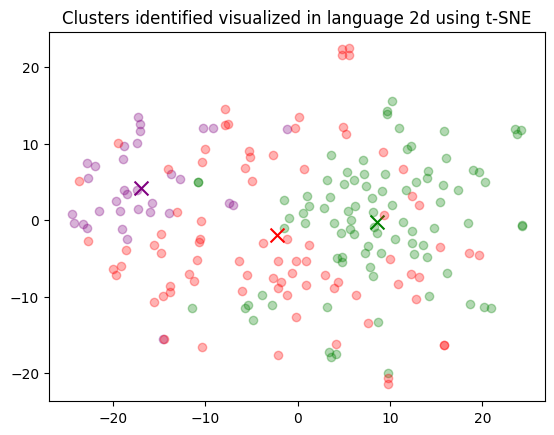

In [124]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate='auto')
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[complete_emebed_party.Cluster == category]
    ys = np.array(y)[complete_emebed_party.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [126]:
import plotly.express as px

# Assuming you've performed TSNE and have your DataFrame ready
df_vis = pd.DataFrame({
    'x': x,
    'y': y,
    'Cluster': complete_emebed_party.Cluster_experiment,
    'SchoolName': complete_emebed_party.schoolname,
    'DistrictPoliticalAffiliation': complete_emebed_party.district_majority_party,
    'CharterPoliticalAffiliation':complete_emebed_party.charter_majority_party  # Replace with your actual column
})

fig = px.scatter(df_vis, x='x', y='y', color='Cluster', hover_data=['SchoolName', 'DistrictPoliticalAffiliation','CharterPoliticalAffiliation'])

fig.show()

In [129]:
list_content_cluster_1=list(complete_emebed_party.mission_statement_experiment[complete_emebed_party.Cluster_experiment == 1])
list_content_cluster_1

['Our understandings of humankind and our universe are expressed and communicated through all of our arts and sciences.\xa0 Each method of expression \x96 language, painting, music, mathematics, and science \x96 has its rules and techniques for effectively communicating these ideas and understandings.',
 'Our understandings of humankind and our universe are expressed and communicated through all of our arts and sciences.\xa0 Each method of expression \x96 language, painting, music, mathematics, and science \x96 has its rules and techniques for effectively communicating these ideas and understandings.',
 'Our understandings of humankind and our universe are expressed and communicated through all of our arts and sciences.\xa0 Each method of expression \x96 language, painting, music, mathematics, and science \x96 has its rules and techniques for effectively communicating these ideas and understandings.',
 'Our understandings of humankind and our universe are expressed and communicated thr

In [130]:
list_content_cluster_2=list(complete_emebed_party.mission_statement_experiment[complete_emebed_party.Cluster_experiment == 2])
list_content_cluster_2

['The vision of Durham Charter School is to prepare students to succeed in either college or career by 2030. The mission of the school is to provide all children with an outstanding comprehensive education that includes rigorous academics, as well as diverse opportunities to develop mastery in the arts, athletics, and engineering. The school teaches character values through its focus on building the Cs of Character, Culture, and Community, with values such as positive attitude, respect, integrity, determination, and empathy. The school offers extracurricular programming in arts, athletics, and science, with options such as visual arts, music, library media, and more. The curriculum includes math, English language arts, and science programs, and the school offers sports such as soccer, volleyball, basketball, cheer, track and field, and more. The school plans to implement an Academically Intellectually Gifted program and offers high school students the option of qualifying for an Honors

In [131]:
list_content_cluster_0=list(complete_emebed_party.mission_statement_experiment[complete_emebed_party.Cluster_experiment == 0])
list_content_cluster_0

['ensure that each and every student receives a high-quality educational experience, including academics, social/emotional learning, behavior, and mental health. They have implemented a Multi-Tiered System of Supports (MTSS) to address barriers to academic success and provide additional support and interventions for students with academic or other needs. They also offer Title programs to provide assistance to educationally and economically disadvantaged children. Additionally, the school offers clubs, activities, field trips, and virtual engagement opportunities for students to communicate, socialize, and participate in cooperative learning.',
 "be a rich school community that uses innovations in technology to educate and bring a wide range of students, families, and educators together. The mission of the school is to expand educational choice through innovative and technology-rich instructional practices and to develop each student's full potential for academic and post-secondary succ

In [133]:
complete_emebed_party.to_csv('../processed_data/complete_with_experiment.csv' , index=False)